In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt

## Example with generated data

Problem: customer segmentation for a marketing campaign of an app. For a group of 20 people, we have their age and their weekly hours of app usage

In [2]:
age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]

In [3]:
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


<AxesSubplot:xlabel='age', ylabel='hours'>

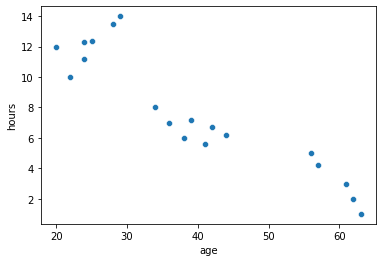

In [4]:
sns.scatterplot(x = df['age'], y = df['hours'])

#### Using two clusters

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [6]:
# Predicting / assigning the clusters:
df_cl = df
df_cl['clusters'] = kmeans.predict(df)

# Check the size of the clusters
print(df_cl['clusters'].value_counts().sort_index())


0    7
1    7
2    5
Name: clusters, dtype: int64


[0 1 2]


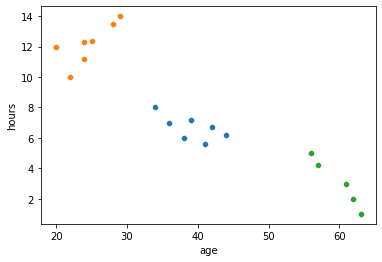

In [7]:
clusterval = np.unique(df['clusters'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

#### Using different number of clusters

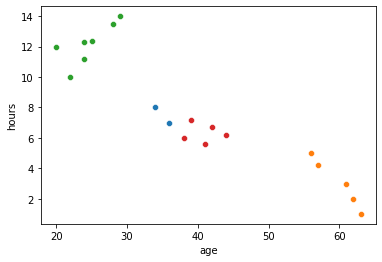

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

df_cl['clusters'] = kmeans.predict(df)

clusterval = np.unique(df['clusters'])
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

## Using data

In [9]:
from sklearn import datasets
# data set on wine in this data set, we are grouping similar wines together
#


data = datasets.load_wine()
print(data.keys())
print(data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

In [10]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
#this data ALSO has a target variable for supervised learning problems, but this is not what we are interested in here!


In [11]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep, columns = X.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
# Its has scaled the data and also rounded it up
round(pd.DataFrame(X_prep, columns = X.columns).describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-4.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
max,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0


#### We will run a K-Means clustering with 8 clusters (random choice).

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For best practice, we will also specifiy a value for random_state. Specifying this is just used for reproducing the same results on every run - since the K-Means algorithm is stochastic, we will otherwise get slightly different results each time even if parameters are the same, so fixing it makes it easier to compare. 

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [15]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters # this creates a seperate columns for cluster
X_df.head(20)

0    18
1    23
2    17
3    29
4    23
5    26
6     4
7    38
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,7
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,7
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,7
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,7


#### Basic Performance value: 'inertia'.
'Inertia' is the mean squared distance between each instance and its closest centroid.

In [16]:
kmeans.inertia_

938.6711756898961

### Choosing a value for K

Elbow plot using inertia

[1, 2, 3, 4, 5, 6, 7, 8]
[2313.999999999999, 1658.758852429096, 1277.928488844643, 1182.7435177151144, 1110.493161485679, 1048.1806943123318, 985.2282631071001, 938.6711756898961]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

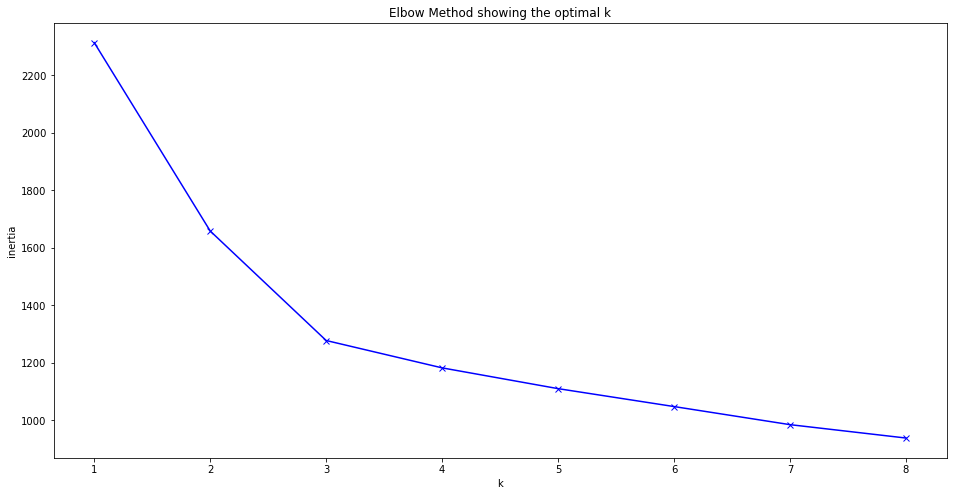

In [17]:
K = range(1, 9)
print(list(K)) # This will print a list of 1-8
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    
print(inertia) # This shows the average squared distance from each point to its centroids

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # plotting K against the number of inertia
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3, and then a very slight one at k=10.
Do not take this plot as the ultimate source of truth, but also look at your business needs - what if our business needs involve having a k between say 4 and 8?

There is also another metric that will help us decide.

#### Silhouette Score

This measures how similar an observation is to its own cluster compared to other clusters. It looks at how close is the cluster and how far it is to the next cluster. Also, it will always be btw -1 & 1. We will look at upward spike unlike K-Means where we look at downwards spike (Elbow method)

A score of 1 means that the cluster is dense and well-separated
from the other clusters. If the value is close to 0 then clusters are
overlapping with samples being very close to the boundary of their
neighboring clusters. If the score gets negative, this indicates that
samples might have been assigned to the wrong clusters

[2, 3, 4, 5, 6, 7, 8]
[0.25931695553182554, 0.2848589191898987, 0.2472914654135894, 0.2530132452438398, 0.2007058222128914, 0.19862052942898747, 0.14621046375905294]


Text(0.5, 1.0, 'silhouette score showing the optimal k')

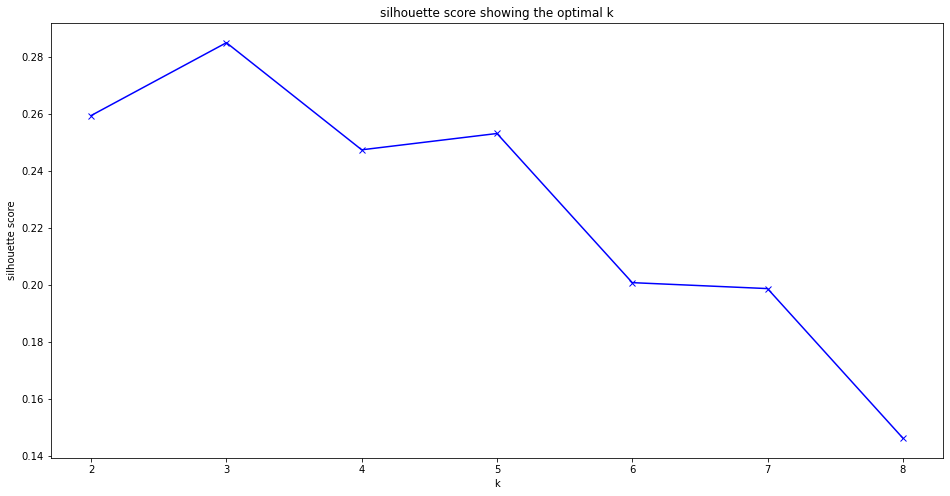

In [18]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('silhouette score showing the optimal k')



You can see that the silhouette score also has an upward spike at 3! If our business requires us to have between 4 and 8 clusters, then according to this plot 5 would be the optimal number.

In [19]:
# silhouette score are less common, but they can tell you more things about your model than K-Means. K-Means are very common